# Applications

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Polynomial Interpolation

[Polynomial interpolation](https://en.wikipedia.org/wiki/Polynomial_interpolation) finds the unique polynomial of degree $n$ which passes through $n+1$ points in the $xy$-plane. For example, two points in the $xy$-plane determine a line and three points determine a parabola.

### Formulation

Suppose we have $n + 1$ points in the $xy$-plane

$$
(x_0,y_0),(x_1,y_1),\dots,(x_n,y_n)
$$

such that all the $x$ values are distinct ($x_i \not= x_j$ for $i \not= j$). The general form of a degree $n$ polynomial is

$$
p(x) = a_0 + a_1 x + a_2x^2 + \cdots + a_n x^n
$$

If $p(x)$ is the unique degree $n$ polynomial which interpolates all the points, then the coefficients $a_0$, $a_1$, $\dots$, $a_n$ satisfy the following equations:

\begin{align}
a_0 + a_1x_0 + a_2x_0^2 + \cdots + a_n x_0^n &= y_0 \\\
a_0 + a_1x_1 + a_2x_1^2 + \cdots + a_n x_1^n &= y_1 \\\
& \ \ \vdots \\\
a_0 + a_1x_n + a_2x_n^2 + \cdots + a_n x_n^n &= y_n
\end{align}

Therefore the vector of coefficients

$$
\mathbf{a} =
\begin{bmatrix}
a_0 \\\
a_1 \\\
\vdots \\\
a_n
\end{bmatrix}
$$

is the unique the solution of the linear system of equations

$$
X \mathbf{a}=\mathbf{y}
$$

where $X$ is the [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) and $\mathbf{y}$ is the vector of $y$ values

$$
X =
\begin{bmatrix}
1 & x_0 & x_0^2 & \dots & x_0^n \\\
1 & x_1 & x_1^2 & \dots & x_1^n \\\
 & \vdots & & & \vdots \\\
1 & x_n & x_n^2 & \dots & x_n^n \\\
\end{bmatrix}
\ \ \mathrm{and} \ \
\mathbf{y} =
\begin{bmatrix}
y_0 \\\
y_1 \\\
y_2 \\\
\vdots \\\
y_n
\end{bmatrix}
$$

### Examples

**Simple Parabola**

Let's do a simple example. We know that $y=x^2$ is the unique degree 2 polynomial that interpolates the points $(-1,1)$, $(0,0)$ and $(1,1)$. Let's compute the polynomial interpolation of these points and verify the expected result $a_0=0$, $a_1=0$ and $a_2=1$.

Create the Vandermonde matrix $X$ with the array of $x$ values:

In [2]:
x = np.array([-1,0,1])
X = np.column_stack([[1,1,1],x,x**2])
print(X)

[[ 1 -1  1]
 [ 1  0  0]
 [ 1  1  1]]


Create the vector $\mathbf{y}$ of $y$ values:

In [3]:
y = np.array([1,0,1]).reshape(3,1)
print(y)

[[1]
 [0]
 [1]]


We expect the solution $\mathbf{a} = [0,0,1]^T$:

In [4]:
a = la.solve(X,y)
print(a)

[[0.]
 [0.]
 [1.]]


Success!

**Another Parabola**

The polynomial interpolation of 3 points $(x_0,y_0)$, $(x_1,y_1)$ and $(x_2,y_2)$ is the parabola $p(x) = a_0 + a_1x + a_2x^2$ such that the coefficients satisfy

\begin{align}
a_0 + a_1x_0 + a_2x_0^2 = y_0 \\\
a_0 + a_1x_1 + a_2x_1^2 = y_1 \\\
a_0 + a_1x_2 + a_2x_2^2 = y_2
\end{align}

Let's find the polynomial interpolation of the points $(0,6)$, $(3,1)$ and $(8,2)$.

Create the Vandermonde matrix $X$:

In [5]:
x = np.array([0,3,8])
X = np.column_stack([[1,1,1],x,x**2])
print(X)

[[ 1  0  0]
 [ 1  3  9]
 [ 1  8 64]]


And the vector of $y$ values:

In [6]:
y = np.array([6,1,2]).reshape(3,1)
print(y)

[[6]
 [1]
 [2]]


Compute the vector $\mathbf{a}$ of coefficients:

In [7]:
a = la.solve(X,y)
print(a)

[[ 6.        ]
 [-2.36666667]
 [ 0.23333333]]


And plot the result:

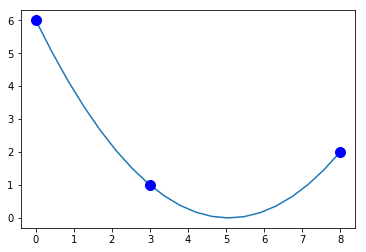

In [8]:
xs = np.linspace(0,8,20)
ys = a[0] + a[1]*xs + a[2]*xs**2
plt.plot(xs,ys,x,y,'b.',ms=20)
plt.show()

**Over Fitting 10 Random Points**

Now let's interpolate points with $x_i=i$, $i=0,\dots,9$, and 10 random integers sampled from $[0,10)$ as $y$ values:

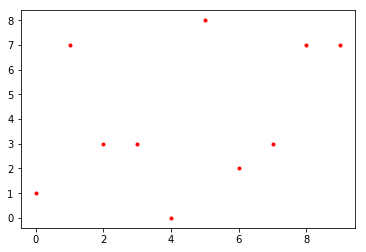

In [9]:
N = 10
x = np.arange(0,N)
y = np.random.randint(0,10,N)
plt.plot(x,y,'r.')
plt.show()

Create the Vandermonde matrix and verify the first 5 rows and columns:

In [10]:
X = np.column_stack([x**k for k in range(0,N)])
print(X[:5,:5])

[[  1   0   0   0   0]
 [  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]


We could also use the NumPy function [`numpy.vander`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.vander.html). We specify the option `increasing=True` so that powers of $x_i$ increase left-to-right:

In [11]:
X = np.vander(x,increasing=True)
print(X[:5,:5])

[[  1   0   0   0   0]
 [  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]


Solve the linear system:

In [12]:
a = la.solve(X,y)

Plot the interpolation:

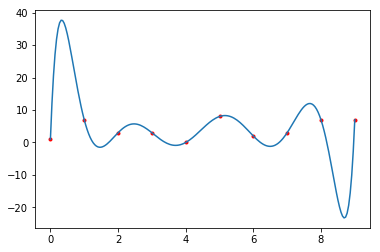

In [13]:
xs = np.linspace(0,N-1,200)
ys = sum([a[k]*xs**k for k in range(0,N)])
plt.plot(x,y,'r.',xs,ys)
plt.show()

Success! But notice how unstable the curve is. That's why it better to use a [cubic spline](https://en.wikipedia.org/wiki/Spline_%28mathematics%29) to interpolate a large number of points.

However real-life data is usually very noisy and interpolation is not the best tool to fit a line to data. Instead we would want to take a polynomial with smaller degree (like a line) and fit it as best we can without interpolating the points.

## Least Squares Linear Regression

Suppose we have $n+1$ points

$$
(x_0,y_0) , (x_1,y_1) , \dots , (x_n,y_n)
$$

in the $xy$-plane and we want to fit a line

$$
y=a_0 + a_1x
$$

that "best fits" the data. There are different ways to quantify what "best fit" means but the most common method is called [least squares linear regression](https://en.wikipedia.org/wiki/Linear_regression). In least squares linear regression, we want to minimize the sum of squared errors

$$
SSE = \sum_i (y_i - (a_0 + a_1 x_i))^2
$$

### Formulation

If we form matrices

$$
X =
\begin{bmatrix}
1 & x_0 \\\
1 & x_1 \\\
\vdots & \vdots \\\
1 & x_n
\end{bmatrix}
\ , \ \
\mathbf{y} =
\begin{bmatrix}
y_0 \\\
y_1 \\\
\vdots \\\
y_n
\end{bmatrix}
\ , \ \
\mathbf{a} = 
\begin{bmatrix}
a_0 \\\ a_1
\end{bmatrix}
$$

then the sum of squared errors can be expressed as

$$
SSE = \Vert \mathbf{y} - X \mathbf{a} \Vert^2
$$

---

**Theorem.** (Least Squares Linear Regression) Consider $n+1$ points

$$
(x_0,y_0) , (x_1,y_1) , \dots , (x_n,y_n)
$$

in the $xy$-plane. The coefficients $\mathbf{a} = [a_0,a_1]^T$ which minimize the sum of squared errors

$$
SSE = \sum_i (y_i - (a_0 + a_1 x_i))^2
$$

is the unique solution of the system

$$
\left( X^T X \right) \mathbf{a} = X^T \mathbf{y}
$$

*Sketch of Proof.* The product $X\mathbf{a}$ is in the column space of $X$. The line connecting $\mathbf{y}$ to the nearest point in the column space of $X$ is perpendicluar to the column space of $X$. Therefore

$$
X^T \left( \mathbf{y} - X \mathbf{a} \right) = \mathbf{0}
$$

and so

$$
\left( X^T X \right) \mathbf{a} = X^T \mathbf{y}
$$

---

### Examples

**Fake Noisy Linear Data**

Let's do an example with some fake data. Let's build a set of random points based on the model

$$
y = a_0 + a_1x + \epsilon
$$

for some arbitrary choice of $a_0$ and $a_1$. The factor $\epsilon$ represents some random noise which we model using the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution). We can generate random numbers sampled from the standard normal distribution using the NumPy function [`numpy.random.rand`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html).

The goal is to demonstrate that we can use linear regression to retrieve the coefficeints $a_0$ and $a_1$ from the linear regression calculation.

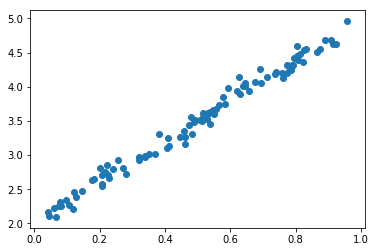

In [14]:
a0 = 2
a1 = 3
N = 100
x = np.random.rand(100)
noise = 0.1*np.random.randn(100)
y = a0 + a1*x + noise
plt.scatter(x,y);
plt.show()

Let's use linear regression to retrieve the coefficients $a_0$ and $a_1$. Construct the matrix $X$:

In [15]:
X = np.column_stack([np.ones(N),x])
print(X.shape)

(100, 2)


Let's look at the first 5 rows of $X$ to see that it is in the correct form:

In [16]:
X[:5,:]

array([[1.        , 0.92365627],
       [1.        , 0.78757973],
       [1.        , 0.51506055],
       [1.        , 0.51540875],
       [1.        , 0.86563343]])

Use `scipy.linalg.solve` to solve $\left(X^T X\right)\mathbf{a} = \left(X^T\right)\mathbf{y}$ for $\mathbf{a}$:

In [17]:
a = la.solve(X.T @ X, X.T @ y)
print(a)

[2.02783873 2.95308228]


We have retrieved the coefficients of the model almost exactly! Let's plot the random data points with the linear regression we just computed.

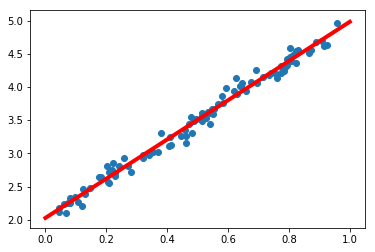

In [18]:
xs = np.linspace(0,1,10)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.show()

**Real Kobe Bryant Data**

Let's work with some real data. [Kobe Bryant](https://www.basketball-reference.com/players/b/bryanko01.html) retired in 2016 with 33643 total points which is the [third highest total points in NBA history](https://en.wikipedia.org/wiki/List_of_National_Basketball_Association_career_scoring_leaders). How many more years would Kobe Bryant have to had played to pass [Kareem Abdul-Jabbar's](https://en.wikipedia.org/wiki/Kareem_Abdul-Jabbar) record 38387 points?

Kobe Bryant's peak was the 2005-2006 NBA season. Let's look at Kobe Bryant's total games played and points per game from 2006 to 2016.

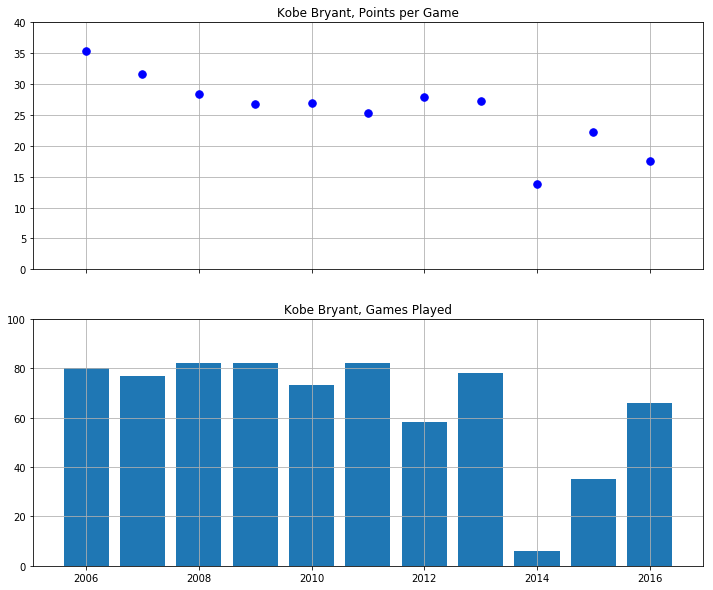

In [19]:
years = np.array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])
games = [80,77,82,82,73,82,58,78,6,35,66]
points = np.array([35.4,31.6,28.3,26.8,27,25.3,27.9,27.3,13.8,22.3,17.6])

fig = plt.figure(figsize=(12,10))
axs = fig.subplots(2,1,sharex=True)
axs[0].plot(years,points,'b.',ms=15)
axs[0].set_title('Kobe Bryant, Points per Game')
axs[0].set_ylim([0,40])
axs[0].grid(True)
axs[1].bar(years,games)
axs[1].set_title('Kobe Bryant, Games Played')
axs[1].set_ylim([0,100])
axs[1].grid(True)
plt.show()

Kobe was injured for most of the 2013-2014 NBA season and played only 6 games. This is an outlier and so we can drop this data point:

In [20]:
years = np.array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016])
games = np.array([80,77,82,82,73,82,58,78,35,66])
points = np.array([35.4,31.6,28.3,26.8,27,25.3,27.9,27.3,22.3,17.6])

Let's compute the average games played per season over this period:

In [21]:
avg_games_per_year = np.mean(games)
print(avg_games_per_year)

71.3


Compute the linear model for points per game:

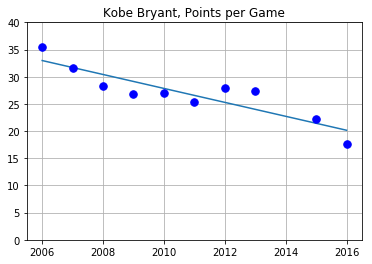

In [22]:
X = np.column_stack([np.ones(len(years)),years])
a = la.solve(X.T @ X, X.T @ points)
model = a[0] + a[1]*years

plt.plot(years,model,years,points,'b.',ms=15)
plt.title('Kobe Bryant, Points per Game')
plt.ylim([0,40])
plt.grid(True)
plt.show()

Now we can extrapolate to future years and multiply points per games by games per season and compute the cumulative sum to see Kobe's total points:

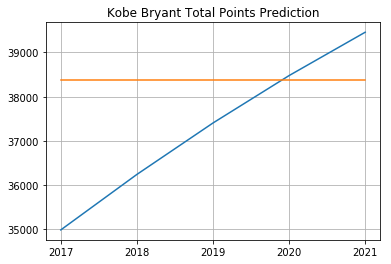

In [23]:
future_years = np.array([2017,2018,2019,2020,2021])
future_points = (a[0] + a[1]*future_years)*avg_games_per_year
total_points = 33643 + np.cumsum(future_points)
kareem = 38387*np.ones(len(future_years))

plt.plot(future_years,total_points,future_years,kareem)
plt.grid(True)
plt.xticks(future_years)
plt.title('Kobe Bryant Total Points Prediction')
plt.show()

Only 4 more years!

## Polynomial Regression

### Formulation

The same idea works for fitting a degree $d$ polynomial model

$$
y = a_0 + a_1x + a_2x^2 + \cdots + a_dx^d
$$

to a set of $n+1$ data points

$$
(x_0,y_0), (x_1,y_1), \dots , (x_n,y_n)
$$

We form the matrices as before but now the Vandermonde matrix $X$ has $d+1$ columns

$$
X =
\begin{bmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^d \\\
1 & x_1 & x_1^2 & \cdots & x_1^d \\\
 & \vdots & & & \vdots \\\
1 & x_n & x_n^2 & \cdots & x_n^d
\end{bmatrix}
\ , \ \
\mathbf{y} =
\begin{bmatrix}
y_0 \\\
y_1 \\\
\vdots \\\
y_n
\end{bmatrix}
\ , \ \
\mathbf{a} =
\begin{bmatrix}
a_0 \\\
a_1 \\\
a_2 \\\
\vdots \\\
a_d
\end{bmatrix}
$$

The coefficients $\mathbf{a} = [a_0,a_1,a_2,\dots,a_d]^T$ which minimize the sum of squared errors $SSE$ is the unique solution of the linear system

$$
\left( X^T X \right) \mathbf{a} = \left( X^T \right) \mathbf{y}
$$

### Example

**Fake Noisy Quadratic Data**

Let's build some fake data using a quadratic model $y = a_0 + a_1x + a_2x^2 + \epsilon$ and use linear regression to retrieve the coefficients $a_0$, $a_1$ and $a_2$.

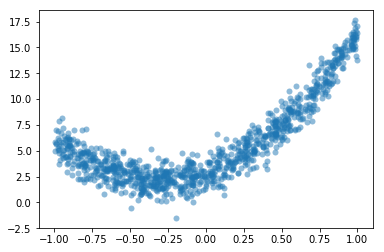

In [24]:
a0 = 3
a1 = 5
a2 = 8
N = 1000
x = 2*np.random.rand(N) - 1 # Random numbers in the interval (-1,1)
noise = np.random.randn(N)
y = a0 + a1*x + a2*x**2 + noise
plt.scatter(x,y,alpha=0.5,lw=0);
plt.show()

Construct the matrix $X$:

In [25]:
X = np.column_stack([np.ones(N),x,x**2])

Use `scipy.linalg.solve` to solve $\left( X^T X \right) \mathbf{a} = \left( X^T \right) \mathbf{y}$:

In [26]:
a = la.solve((X.T @ X),X.T @ y)

Plot the result:

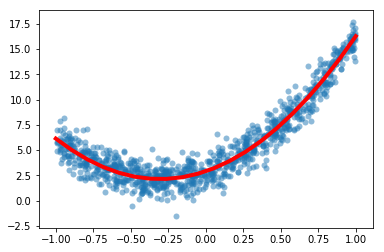

In [27]:
xs = np.linspace(-1,1,20)
ys = a[0] + a[1]*xs + a[2]*xs**2
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y,alpha=0.5,lw=0)
plt.show()

## Graph Theory

A [graph](https://en.wikipedia.org/wiki/Graph_%28discrete_mathematics%29) is a set of vertices and a set of edges connecting some of the vertices. We will consider simple, undirected, connected graphs:

* a graph is [simple](https://en.wikipedia.org/wiki/Graph_%28discrete_mathematics%29#Simple_graph) if there are no loops or multiple edges between vertices
* a graph is [undirected](https://en.wikipedia.org/wiki/Graph_%28discrete_mathematics%29#Undirected_graph) if the edges do not have an orientation
* a graph is [connected](https://en.wikipedia.org/wiki/Graph_%28discrete_mathematics%29#Connected_graph) if each vertex is connected to every other vertex in the graph by a path

We can visualize a graph as a set of vertices and edges and answer questions about the graph just by looking at it. However this becomes much more difficult with a large graphs such as a [social network graph](https://en.wikipedia.org/wiki/Social_network_analysis). Instead, we construct matrices from the graph such as the [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) and the [Laplacian matrix](https://en.wikipedia.org/wiki/Laplacian_matrix) and study their properties.

[Spectral graph theory](https://en.wikipedia.org/wiki/Spectral_graph_theory) is the study of the eigenvalues of the adjacency matrix (and other associated matrices) and the relationships to the structure of $G$.

### NetworkX

Let's use the Python package [NetworkX](https://networkx.github.io/) to construct and visualize some simple graphs.

In [28]:
import networkx as nx

### Adjacency Matrix

The [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) $A_G$ of a graph $G$ with $n$ vertices is the square matrix of size $n$ such that $A_{i,j} = 1$ if vertices $i$ and $j$ are connected by an edge, and $A_{i,j} = 0$ otherwise.

We can use `networkx` to create the adjacency matrix of a graph $G$. The function `nx.adjacency_matrix` returns a [sparse matrix](https://docs.scipy.org/doc/scipy/reference/sparse.html) and we convert it to a regular NumPy array using the `todense` method.

For example, plot the [complete graph](https://en.wikipedia.org/wiki/Complete_graph) with 5 vertices and compute the adjacency matrix:

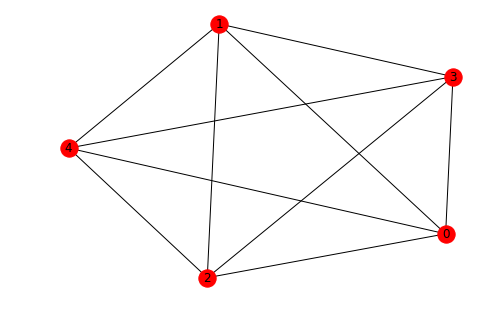

In [30]:
G = nx.complete_graph(5)
nx.draw(G,with_labels=True)

In [31]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]


### Length of the Shortest Path

The length of the [shortest path](https://en.wikipedia.org/wiki/Shortest_path_problem) between vertices in a simple, undirected graph $G$ can be easily computed from the adjacency matrix $A_G$. In particular, the length of shortest path from vertex $i$ to vertex $j$ ($i\not=j$) is the smallest positive integer $k$ such that $A^k_{i,j} \not= 0$.

Plot the [dodecahedral graph](https://en.wikipedia.org/wiki/Regular_dodecahedron#Dodecahedral_graph):

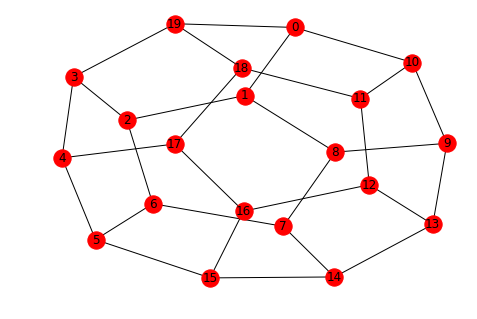

In [32]:
G = nx.dodecahedral_graph()
nx.draw(G,with_labels=True)

In [33]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


With this labelling, let's find the length of the shortest path from vertex $0$ to $15$:

In [34]:
i = 0
j = 15
k = 1
Ak = A
while Ak[i,j] == 0:
    Ak = Ak @ A
    k = k + 1
print('Length of the shortest path is',k)

Length of the shortest path is 5


### Triangles in a Graph

A simple result in spectral graph theory is the number of [triangles](https://en.wikipedia.org/wiki/Adjacency_matrix#Matrix_powers) in a graph $T(G)$ is given by:

$$
T(G) = \frac{1}{6} ( \lambda_1^3 + \lambda_2^3 + \cdots + \lambda_n^3)
$$

where $\lambda_1 \leq \lambda_2 \leq \cdots \leq \lambda_n$ are the eigenvalues of the adjacency matrix.

Let's verify this for the simplest case, the complete graph on 3 vertices:

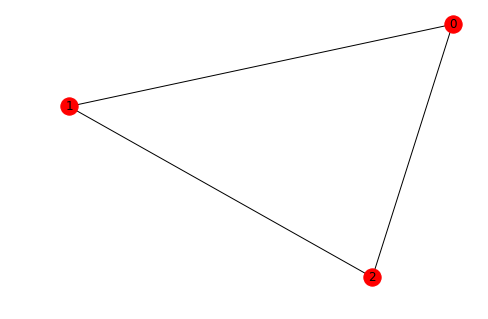

In [35]:
C3 = nx.complete_graph(3)
nx.draw(C3,with_labels=True)

In [36]:
A3 = nx.adjacency_matrix(C3).todense()
eigvals, eigvecs = la.eig(A3)
int(np.round(np.sum(eigvals.real**3)/6,0))

1

Let's compute the number of triangles in the complete graph 7 vertices:

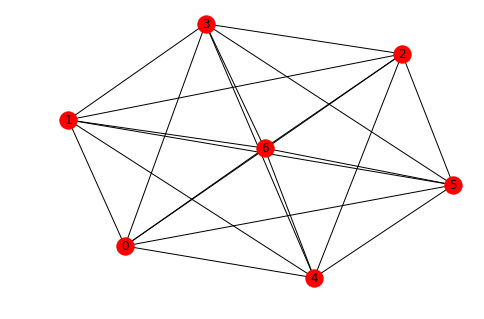

In [37]:
C7 = nx.complete_graph(7)
nx.draw(C7,with_labels=True)

In [38]:
A7 = nx.adjacency_matrix(C7).todense()
eigvals, eigvecs = la.eig(A7)
int(np.round(np.sum(eigvals.real**3)/6,0))

35

There are 35 triangles in the complete graph with 7 vertices!

Let's write a function called `triangles` which takes a square matrix `M` and return the sum

$$
\frac{1}{6} ( \lambda_1^3 + \lambda_2^3 + \cdots + \lambda_n^3)
$$

where $\lambda_i$ are the eigenvalues of the symmetric matrix $A = (M + M^T)/2$. Note that $M = A$ if $M$ is symmetric. The return value is the number of triangles in the graph $G$ if the input $M$ is the adjacency matrix.

In [39]:
def triangles(M):
    A = (M + M.T)/2
    eigvals, eigvecs = la.eig(A)
    eigvals = eigvals.real
    return int(np.round(np.sum(eigvals**3)/6,0))

Next, let's try a [Turan graph](https://en.wikipedia.org/wiki/Tur%C3%A1n_graph).

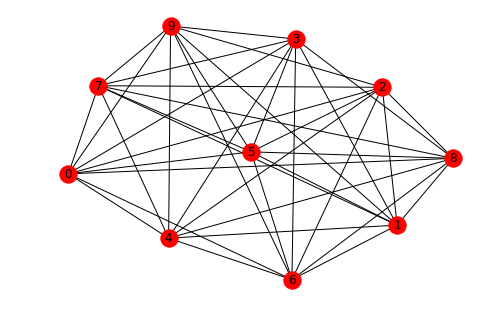

In [40]:
G = nx.turan_graph(10,5)
nx.draw(G,with_labels=True)

In [41]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 0 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [1 1 1 1 0 0 1 1 1 1]
 [1 1 1 1 0 0 1 1 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 0 0]]


Find the number of triangles:

In [42]:
triangles(A)

80

Finally, let's compute the number of triangles in the dodecahedral graph:

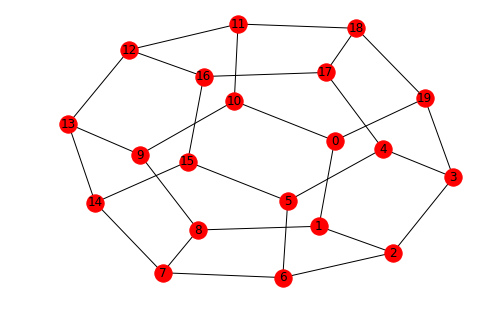

In [43]:
G = nx.dodecahedral_graph()
nx.draw(G,with_labels=True)

In [44]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


In [45]:
np.round(triangles(A),2)

0

## Exercises

*Under Construction*